In [19]:
import numpy as np
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import aplpy
import colorcet
import matplotlib as mpl
from astropy.table import QTable, join
from scipy import stats

plt.style.use('paper.mplstyle')

import sys 
sys.path.append('../../../../misc/data_cube_analysis')  
from bindata import *
from histograms import *

In [24]:
root_dir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies'
table = QTable.read('%s/data_hstha_nebulae_catalogue/all/nebulae_catalogue.fits' %root_dir)
table['HA6562_LUMINOSITY_HST']

<MaskedQuantity [4.23114183e+36, 1.51851820e+37, 4.35363210e+36, ...,
                 9.42346545e+36, 7.94670885e+37, 4.70774506e+36] erg / s>

In [4]:
# Mask bad data...
mask_flags = ~((table['flag_edge_hst']==1)|(table['flag_edge_MUSE']==1)|(table['flag_star_MUSE']==1))
table = table[mask_flags]
# Mask HII regions...
mask_hiiregion = table['HII_class_v3_MUSE'] == True
table = table[mask_hiiregion]
table

gal_name,region_ID,x_max,y_max,x_com,y_com,ra_max,dec_max,ra_com,dec_com,npix,HA6562_FLUX_HST,HA6562_FLUX_ERR_HST,area_exact,radius_circ,flux_max,flux_min,flux_mean,radius_circ_pc,x_mom,y_mom,ra_mom,dec_mom,area_ellipse,major_sigma,minor_sigma,mean_sigma,position_angle,mean_sigma_pc,complexity_score,flag_edge_hst,flag_touch_hst,cen_x_MUSE,cen_y_MUSE,cen_ra_MUSE,cen_dec_MUSE,cen_x_geo_MUSE,cen_y_geo_MUSE,flag_edge_MUSE,flag_nearby_MUSE,flag_star_MUSE,deproj_dist_MUSE,deproj_phi_MUSE,region_area_MUSE,region_circ_rad_MUSE,HB4861_FLUX_MUSE,OIII5006_FLUX_MUSE,HA6562_FLUX_MUSE,NII6583_FLUX_MUSE,SII6716_FLUX_MUSE,SII6730_FLUX_MUSE,SIII9068_FLUX_MUSE,OI6300_FLUX_MUSE,NII5754_FLUX_MUSE,HEI5875_FLUX_MUSE,SIII6312_FLUX_MUSE,OI6363_FLUX_MUSE,OII7319_FLUX_MUSE,OII7330_FLUX_MUSE,HB4861_FLUX_ERR_MUSE,OIII5006_FLUX_ERR_MUSE,HA6562_FLUX_ERR_MUSE,NII6583_FLUX_ERR_MUSE,SII6716_FLUX_ERR_MUSE,SII6730_FLUX_ERR_MUSE,SIII9068_FLUX_ERR_MUSE,OI6300_FLUX_ERR_MUSE,NII5754_FLUX_ERR_MUSE,HEI5875_FLUX_ERR_MUSE,SIII6312_FLUX_ERR_MUSE,OI6363_FLUX_ERR_MUSE,OII7319_FLUX_ERR_MUSE,OII7330_FLUX_ERR_MUSE,HA6562_SIGMA_MUSE,NII6583_SIGMA_MUSE,OIII5006_SIGMA_MUSE,HA6562_VEL_MUSE,NII6583_VEL_MUSE,OIII5006_VEL_MUSE,HA6562_SIGMA_ERR_MUSE,NII6583_SIGMA_ERR_MUSE,OIII5006_SIGMA_ERR_MUSE,HA6562_VEL_ERR_MUSE,NII6583_VEL_ERR_MUSE,OIII5006_VEL_ERR_MUSE,HB4861_FLUX_CORR_MUSE,OIII5006_FLUX_CORR_MUSE,HA6562_FLUX_CORR_MUSE,NII6583_FLUX_CORR_MUSE,SII6716_FLUX_CORR_MUSE,SII6730_FLUX_CORR_MUSE,SIII9068_FLUX_CORR_MUSE,OI6300_FLUX_CORR_MUSE,NII5754_FLUX_CORR_MUSE,HEI5875_FLUX_CORR_MUSE,SIII6312_FLUX_CORR_MUSE,OI6363_FLUX_CORR_MUSE,OII7319_FLUX_CORR_MUSE,OII7330_FLUX_CORR_MUSE,HB4861_FLUX_CORR_ERR_MUSE,OIII5006_FLUX_CORR_ERR_MUSE,HA6562_FLUX_CORR_ERR_MUSE,NII6583_FLUX_CORR_ERR_MUSE,SII6716_FLUX_CORR_ERR_MUSE,SII6730_FLUX_CORR_ERR_MUSE,SIII9068_FLUX_CORR_ERR_MUSE,OI6300_FLUX_CORR_ERR_MUSE,NII5754_FLUX_CORR_ERR_MUSE,HEI5875_FLUX_CORR_ERR_MUSE,SIII6312_FLUX_CORR_ERR_MUSE,OI6363_FLUX_CORR_ERR_MUSE,OII7319_FLUX_CORR_ERR_MUSE,OII7330_FLUX_CORR_ERR_MUSE,EBV_MUSE,EBV_ERR_MUSE,met_scal_MUSE,met_scal_err_MUSE,logq_D91_MUSE,logq_D91_err_MUSE,t_N2_MUSE,t_S3_MUSE,t_N2_err_MUSE,t_S3_err_MUSE,BPT_NII_MUSE,BPT_SII_MUSE,BPT_OI_MUSE,LOG_SIGMA_SFR_CHAB_MUSE,LOG_SIGMA_STMASS_CHAB_MUSE,5thNN_dist_MUSE,NN_number_MUSE,Environment_MUSE,r_R25_MUSE,r_reff_MUSE,HA6562_LUMINOSITY_MUSE,Delta_met_scal_MUSE,pc_per_pixel_MUSE,EW_HA6562_raw_MUSE,EW_HA6562_raw_ERR_MUSE,EW_HB4861_raw_MUSE,EW_HB4861_raw_ERR_MUSE,EW_HA6562_fit_MUSE,EW_HA6562_fit_ERR_MUSE,EW_HB4861_fit_MUSE,EW_HB4861_fit_ERR_MUSE,EW_HA6562_bgcorr_MUSE,EW_HA6562_bgcorr_ERR_MUSE,EW_HB4861_bgcorr_MUSE,EW_HB4861_bgcorr_ERR_MUSE,HII_class_v2_MUSE,HII_class_v3_MUSE,HA6562_FLUX_CORR_HST,HA6562_FLUX_ERR_CORR_HST,HA6562_LUMINOSITY_HST,HA6562_LUMINOSITY_ERR_HST,region_circ_rad_pc_MUSE
,,pix,pix,pix,pix,deg,deg,deg,deg,pix,erg / (s cm2),erg / (s cm2),arcsec2,arcsec,erg / (s cm2),erg / (s cm2),erg / (s cm2),pc,pix,pix,deg,deg,arcsec2,arcsec,arcsec,arcsec,deg,pc,,,,pix,pix,deg,deg,pix,pix,,,,arcsec,rad,pix2,arcsec,1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),1e-20 erg / (s cm2),km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s cm2),erg / (s 

In [5]:
table_b21 = QTable.read('/Users/abarnes/Dropbox/work/Projects/pressures/phangs/data/catalouge/v2/physprops/master.fits') 
for key in table_b21.keys():
    if key == 'region_ID' or key == 'gal_name':
        continue
    table_b21.rename_column(key, key+'_MUSE_B21')

table_all = join(table, table_b21, keys=['region_ID', 'gal_name'])

In [6]:
mask = table_all['ne_sig_MUSE_B21']
table_all = table_all[mask]

In [10]:
radius_str = table_all['reff_Halphalowerlim_MUSE_B21']
radius_mom = table_all['mean_sigma_pc']
radius_cir = table_all['radius_circ_pc']
radius_cir_muse = table_all['region_circ_rad_pc_MUSE']

/Users/abarnes/GitHub/phangs/analysis_phangs_hst/hstha_catalogue_v0p4/run_analysis/../../../../misc/data_cube_analysis/bindata.py:128: RuntimeWarning: divide by zero encountered in scalar divide
  significant[i] = y[i] / sigma[i]


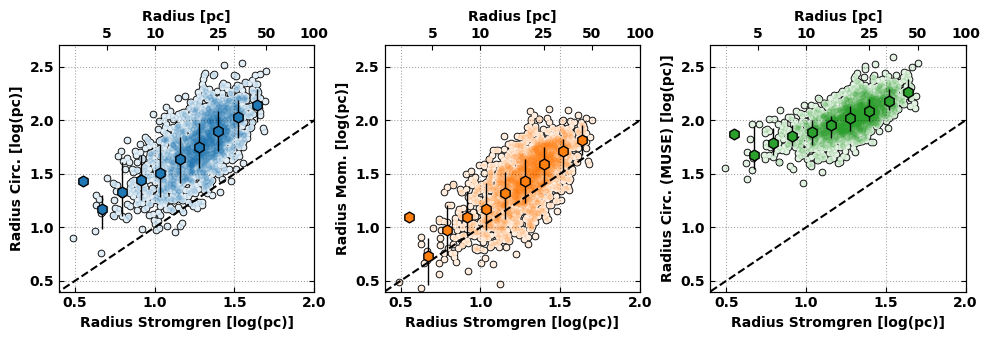

In [18]:
data_x = np.log10(np.array(radius_str.value))
data_y1 = np.log10(np.array(radius_cir.value))
data_y2 = np.log10(np.array(radius_mom.value))
data_y3 = np.log10(np.array(radius_cir_muse.value))

fig = plt.figure(figsize=(10, 3.5)) 
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.scatter(data_x, data_y1, s=20, c='black', rasterized=True)
ax1.scatter(data_x, data_y1, s=10, c='white', rasterized=True)
ax1.scatter(data_x, data_y1, s=10, c='C0', alpha=0.1, rasterized=True)

ax2.scatter(data_x, data_y2, s=20, c='black', rasterized=True)
ax2.scatter(data_x, data_y2, s=10, c='white', rasterized=True)
ax2.scatter(data_x, data_y2, s=10, c='C1', alpha=0.1, rasterized=True)

ax3.scatter(data_x, data_y3, s=20, c='black', rasterized=True)
ax3.scatter(data_x, data_y3, s=10, c='white', rasterized=True)
ax3.scatter(data_x, data_y3, s=10, c='C2', alpha=0.1, rasterized=True)

ax1.plot([0, 1e3], [0, 1e3], c='k', ls='--', label='y=x')
ax2.plot([0, 1e3], [0, 1e3], c='k', ls='--', label='y=x')
ax3.plot([0, 1e3], [0, 1e3], c='k', ls='--', label='y=x')

x, y, stats, bins = get_bins_1d(data_x, data_y1)
ax1.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
ax1.scatter(x, y, s=60, ec='black', fc='C0', zorder=10, marker='h')

x, y, stats, bins = get_bins_1d(data_x, data_y2)
ax2.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
ax2.scatter(x, y, s=60, ec='black', fc='C1', zorder=10, marker='h')

x, y, stats, bins = get_bins_1d(data_x, data_y3)
ax3.errorbar(x, y, yerr=[y-stats['-1sigma'], stats['+1sigma']-y], fmt='none', color='black', lw=1)
ax3.scatter(x, y, s=60, ec='black', fc='C2', zorder=10, marker='h')

for ax in [ax1, ax2, ax3]:

    ax.grid(True, alpha=0.35, ls=':', color='black')
    ax.set_xlabel('Radius Stromgren [log(pc)]')

    ax.set_xlim(0.4, 2)
    ax.set_ylim(0.4, 2.7)

ax1.set_ylabel('Radius Circ. [log(pc)]')
ax2.set_ylabel('Radius Mom. [log(pc)]')
ax3.set_ylabel('Radius Circ. (MUSE) [log(pc)]')

for ax in [ax1, ax2, ax3]:

    ax3 = ax.twiny()
    ax3.set_xlim(ax.get_xlim())
    new_tick_locations = np.log10([5,10,25,50,100])
    ax3.set_xticks(new_tick_locations)
    ax3.set_xticklabels(np.round(np.power(10, new_tick_locations)).astype(int))
    ax3.set_xlabel('Radius [pc]')

fig.tight_layout(h_pad=0.5, w_pad=0.5)

plt.savefig('./figs/scatter_radstromgrencomp.pdf', dpi=200, bbox_inches='tight')

(0.4, 2.0)